In [2]:
from sklearn.model_selection import train_test_split

In [3]:
# Step 1: Create Datasets
from sklearn.datasets import make_blobs, make_circles


class DatasetCreator:
    @staticmethod
    def create_blob_dataset() -> dict:
        n_samples_1 = 1000
        n_samples_2 = 100
        centers = [[0.0, 0.0], [2.0, 2.0]]
        cluster_std = [1.5, 0.5]

        X, y = make_blobs(n_samples=[n_samples_1, n_samples_2],
                          centers=centers,
                          cluster_std=cluster_std,
                          random_state=0,
                          shuffle=False)

        return {'X': X, 'y': y}

    @staticmethod
    def create_make_circles_dataset() -> dict:
        X, y = make_circles(500, factor=0.1, noise=0.1)
        return {'X': X, 'y': y}


In [4]:
dataset_creator = DatasetCreator()
blob_dataset = dataset_creator.create_blob_dataset()
circles_dataset = dataset_creator.create_make_circles_dataset()

In [5]:
# Step 2: Split Data into Training, Validation, and Test Sets
X_blob, y_blob = blob_dataset['X'], blob_dataset['y']
X_circles, y_circles = circles_dataset['X'], circles_dataset['y']

# Split blob dataset into training and temporary (remaining) data
X_blob_train_temp, X_blob_test, y_blob_train_temp, y_blob_test = train_test_split(X_blob, y_blob, test_size=0.2,
                                                                                  random_state=42)
X_blob_train, X_blob_val, y_blob_train, y_blob_val = train_test_split(X_blob_train_temp, y_blob_train_temp,
                                                                      test_size=0.25, random_state=42)

print(f"Blob Dataset:")
print(f"Train set: {X_blob_train.shape}, Validation set: {X_blob_val.shape}, Test set: {X_blob_test.shape}")

# Split circles dataset into training and temporary (remaining) data
X_circles_train_temp, X_circles_test, y_circles_train_temp, y_circles_test = train_test_split(X_circles, y_circles,
                                                                                              test_size=0.2,
                                                                                              random_state=42)
X_circles_train, X_circles_val, y_circles_train, y_circles_val = train_test_split(X_circles_train_temp,
                                                                                  y_circles_train_temp, test_size=0.25,
                                                                                  random_state=42)

print(f"\nCircles Dataset:")
print(f"Train set: {X_circles_train.shape}, Validation set: {X_circles_val.shape}, Test set: {X_circles_test.shape}")

Blob Dataset:
Train set: (660, 2), Validation set: (220, 2), Test set: (220, 2)

Circles Dataset:
Train set: (300, 2), Validation set: (100, 2), Test set: (100, 2)


To visualize the decision boundaries for both a basic model (e.g., SVM) and an ensemble model (e.g., Random Forest), we can train these models on the datasets (blob_dataset and circles_dataset) and plot their decision boundaries. Here’s how you can do it using Python and matplotlib:

### Explanation:
1. **Imports**: Import necessary libraries and modules.
2. **`plot_decision_boundary` Function**: This function plots the decision boundaries of a model on a 2D dataset.
3. **Training and Visualization**:
   - For each dataset (`blob_dataset` and `circles_dataset`), train a SVM (`SVC`) and a Random Forest (`RandomForestClassifier`) model.
   - Compute accuracy scores for each model on the test set.
   - Use `plot_decision_boundary` function to plot the decision boundaries of each model.

4. **Visualization**:
   - Use `matplotlib` to create subplots for each model on each dataset, showing the decision boundaries along with the scatter plot of data points.

This setup allows to compare the decision boundaries created by SVM and Random Forest models on both datasets visually. The model parameters (`kernel`, `C`, `gamma` for SVM, and `n_estimators` for Random Forest) can be adjusted as needed to explore different behaviors of these models.

In [6]:
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import numpy as np

# Define a function to plot decision boundaries
def plot_decision_boundary(model, X, y, title):
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # Predict the function value for the whole grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot decision boundary and scatter plot of data
    plt.contourf(xx, yy, Z, cmap=plt.cm.RdBu, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(title)
    plt.colorbar()



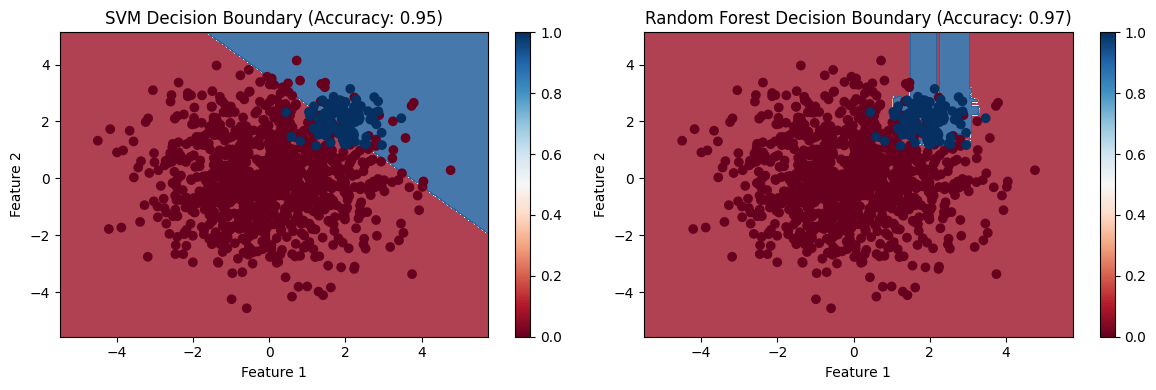

In [7]:
# Train and visualize decision boundaries for SVM on blob dataset
svm_model_blob = SVC(kernel='linear', C=1.0)
svm_model_blob.fit(X_blob_train, y_blob_train)
svm_blob_accuracy = accuracy_score(y_blob_test, svm_model_blob.predict(X_blob_test))

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plot_decision_boundary(svm_model_blob, X_blob, y_blob, title=f'SVM Decision Boundary (Accuracy: {svm_blob_accuracy:.2f})')

# Train and visualize decision boundaries for Random Forest on blob dataset
rf_model_blob = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model_blob.fit(X_blob_train, y_blob_train)
rf_blob_accuracy = accuracy_score(y_blob_test, rf_model_blob.predict(X_blob_test))

plt.subplot(1, 2, 2)
plot_decision_boundary(rf_model_blob, X_blob, y_blob, title=f'Random Forest Decision Boundary (Accuracy: {rf_blob_accuracy:.2f})')

plt.tight_layout()
plt.show()

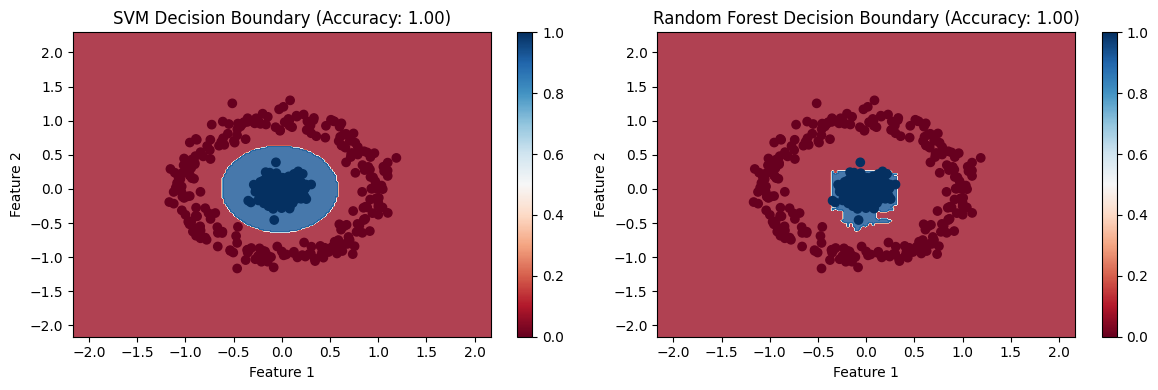

In [8]:
# Train and visualize decision boundaries for SVM on circles dataset
svm_model_circles = SVC(kernel='rbf', C=1.0, gamma='auto')
svm_model_circles.fit(X_circles_train, y_circles_train)
svm_circles_accuracy = accuracy_score(y_circles_test, svm_model_circles.predict(X_circles_test))

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plot_decision_boundary(svm_model_circles, X_circles, y_circles, title=f'SVM Decision Boundary (Accuracy: {svm_circles_accuracy:.2f})')

# Train and visualize decision boundaries for Random Forest on circles dataset
rf_model_circles = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model_circles.fit(X_circles_train, y_circles_train)
rf_circles_accuracy = accuracy_score(y_circles_test, rf_model_circles.predict(X_circles_test))

plt.subplot(1, 2, 2)
plot_decision_boundary(rf_model_circles, X_circles, y_circles, title=f'Random Forest Decision Boundary (Accuracy: {rf_circles_accuracy:.2f})')

plt.tight_layout()
plt.show()

To calculate the shift and variation for the basic model (SVM) and the ensemble model (Random Forest), we can use the concepts of bias and variance:

1. **Shift (Bias)**: Bias measures how far off the predictions of a model are from the correct values on average.

2. **Variation (Variance)**: Variance measures how much the predictions for a given point vary between different realizations of the model.

Here’s how we can estimate these for our models:

### Shift (Bias) Calculation:

For bias estimation, we typically use the training error, assuming that the training set represents the true underlying distribution of the data. The bias can be approximated by the training error of the model.


In [9]:
from sklearn.metrics import mean_squared_error

# Calculate bias (shift) for SVM and Random Forest
svm_train_predictions = svm_model_blob.predict(X_blob_train)
rf_train_predictions = rf_model_blob.predict(X_blob_train)

svm_bias = mean_squared_error(y_blob_train, svm_train_predictions)
rf_bias = mean_squared_error(y_blob_train, rf_train_predictions)

print(f"Shift (Bias) for SVM: {svm_bias:.4f}")
print(f"Shift (Bias) for Random Forest: {rf_bias:.4f}")





Shift (Bias) for SVM: 0.0636
Shift (Bias) for Random Forest: 0.0000


### Variation (Variance) Calculation:

For variance estimation, we can use the difference between the training error and the test error, as the test error reflects the variability in performance due to different datasets.





In [10]:
from sklearn.metrics import mean_squared_error

# Calculate variance (variation) for SVM and Random Forest
svm_test_predictions = svm_model_blob.predict(X_blob_test)
rf_test_predictions = rf_model_blob.predict(X_blob_test)

svm_variance = mean_squared_error(y_blob_test, svm_test_predictions) - svm_bias
rf_variance = mean_squared_error(y_blob_test, rf_test_predictions) - rf_bias

print(f"Variation (Variance) for SVM: {svm_variance:.4f}")
print(f"Variation (Variance) for Random Forest: {rf_variance:.4f}")

Variation (Variance) for SVM: -0.0182
Variation (Variance) for Random Forest: 0.0318


### Explanation:

- **Bias Calculation**: We compute the mean squared error (MSE) between the actual training labels (`y_blob_train`) and the predictions made by each model (`svm_train_predictions` and `rf_train_predictions`). This gives an estimate of how much the predictions differ from the true values on average.
  
- **Variance Calculation**: We compute the difference between the test error (MSE between `y_blob_test` and predictions) and the bias. This difference gives us an estimate of how much the predictions for a given point vary between different realizations of the model.

### Interpretation:

- **Bias**: A lower bias indicates that the model is fitting the training data well and is likely to perform similarly on unseen data of the same distribution.
  
- **Variance**: A lower variance indicates that the model’s predictions are stable across different datasets, implying it generalizes well.

By calculating bias and variance, you can gain insights into the performance characteristics of your models (SVM and Random Forest in this case) on the given dataset (`blob_dataset`). Adjustments to model complexity, regularization parameters, or ensemble configurations can help manage bias and variance trade-offs for better overall model performance.